# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [48]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Create the database.
honeyDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\Graded Assignment 4\\US_honey_production_dataset.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [13]:
# Get a feel for columns/data.
honeyDF.head()

,Unnamed: 0,state,colony_number,yield_per_colony,productions,stocks,average_price,value_of_prod,year
0,0,Alabama,9000,54,73000,73000,240.0,1166000,2010
1,1,Arizona,24000,77,665000,665000,152.0,2809000,2010
2,2,Arkansas,25000,60,360000,360000,147.0,2205000,2010
3,3,California,410000,67,6318000,6318000,155.0,42579000,2010
4,4,Colorado,34000,56,533000,533000,152.0,2894000,2010


In [20]:
# Drop unnamed column and rename remaining columns to something I like better.
honeyDFD = honeyDF.drop(columns=['Unnamed: 0'])
honeyDFR = honeyDFD.rename(columns = {"state":"State","colony_number":"NumberOfColonies",
"yield_per_colony":"YieldPerColony","productions":"Production","stocks":"Stocks","average_price":"AveragePrice",
"value_of_prod":"ProductionValue","year":"Year"})

honeyDFR.head()

,State,NumberOfColonies,YieldPerColony,Production,Stocks,AveragePrice,ProductionValue,Year
0,Alabama,9000,54,73000,73000,240.0,1166000,2010
1,Arizona,24000,77,665000,665000,152.0,2809000,2010
2,Arkansas,25000,60,360000,360000,147.0,2205000,2010
3,California,410000,67,6318000,6318000,155.0,42579000,2010
4,Colorado,34000,56,533000,533000,152.0,2894000,2010


In [18]:
# Check for missing data.
for col in honeyDFR.columns:
    pctMissing = np.mean(honeyDFR[col].isnull())
    print('{} - {}%'.format(col, round(pctMissing*100)))

State - 0%
NumberOfColonies - 0%
YieldPerColony - 0%
Productions - 0%
Stocks - 0%
AveragePrice - 0%
ProductValue - 0%
Year - 0%


In [19]:
# Check data statistics.
honeyDFR.describe()

,NumberOfColonies,YieldPerColony,Productions,Stocks,AveragePrice,ProductValue,Year
count,479.000000,479.000000,4.790000e+02,4.790000e+02,479.000000,4.790000e+02,479.000000
mean,66578.288100,53.167015,9.127724e+05,9.127724e+05,173.884614,7.832610e+06,2015.505219
std,99696.073858,17.066853,1.698062e+06,1.698062e+06,147.478891,1.209393e+07,3.457372
min,3000.000000,27.000000,1.200000e+04,1.200000e+04,1.300000,2.380000e+05,2010.000000
25%,10000.000000,41.000000,9.000000e+04,9.000000e+04,3.850000,1.611500e+06,2012.500000
50%,26000.000000,50.000000,2.550000e+05,2.550000e+05,192.000000,3.252000e+06,2016.000000
75%,77500.000000,62.000000,1.001500e+06,1.001500e+06,243.500000,8.350500e+06,2018.500000
max,550000.000000,131.000000,1.299500e+07,1.299500e+07,874.000000,8.385900e+07,2021.000000


In [47]:
# Checking data types.
honeyDFR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             479 non-null    object 
 1   NumberOfColonies  479 non-null    int64  
 2   YieldPerColony    479 non-null    int64  
 3   Production        479 non-null    int64  
 4   Stocks            479 non-null    int64  
 5   AveragePrice      479 non-null    float64
 6   ProductionValue   479 non-null    int64  
 7   Year              479 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 30.1+ KB


Things to keep in mind:
    NumberOfColonies - Number of honey producing colonies.
    YieldPerColony - Pounds of honey produced per colony.
    Production - Total production in pounds. Obtained by multiplying NumberOfColonies by YieldPerColony. 1*
    Stocks - Pounds of stock held by producers. Seems to always match Production - useless column?
    AveragePrice - Average price in USD per pound based on sales. Seems like honey is far more expensive than I remember it
                   being.
    ProductionValue - USD value of production. Obtained by multiplying Production by AveragePrice. 2*
    Year - Production year.
    
1* Multiplying NumberOfColonies by YieldPerColony doesn't actually equal Production.
2* Multiplying Production by AveragePrice doesn't actually equal ProductionValue.

In [33]:
# What Production should be according to Kaggle documentation.
realProd = honeyDFR["NumberOfColonies"].multiply(honeyDFR["YieldPerColony"])
print(realProd)

0        486000
1       1848000
2       1500000
3      27470000
4       1904000
         ...   
474      240000
475     3072000
476      258000
477     1974000
478     2204000
Length: 479, dtype: int64


In [34]:
# What ProductionValue should be according to Kaggle documentation using supplied Production value.
realProdVal = honeyDFR["Production"].multiply(honeyDFR["AveragePrice"])
print(realProdVal)

0       17520000.0
1      101080000.0
2       52920000.0
3      979290000.0
4       81016000.0
          ...     
474       650170.0
475      3039120.0
476       652800.0
477      2107500.0
478       500940.0
Length: 479, dtype: float64


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

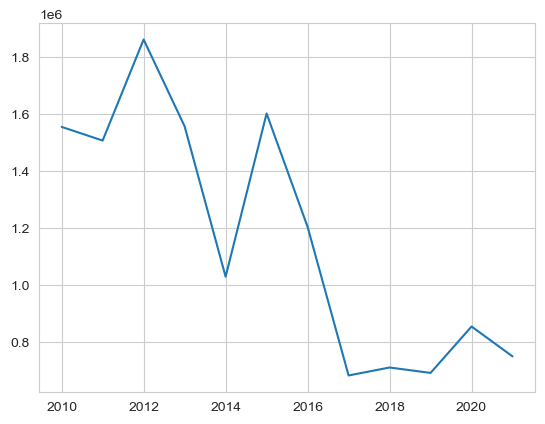

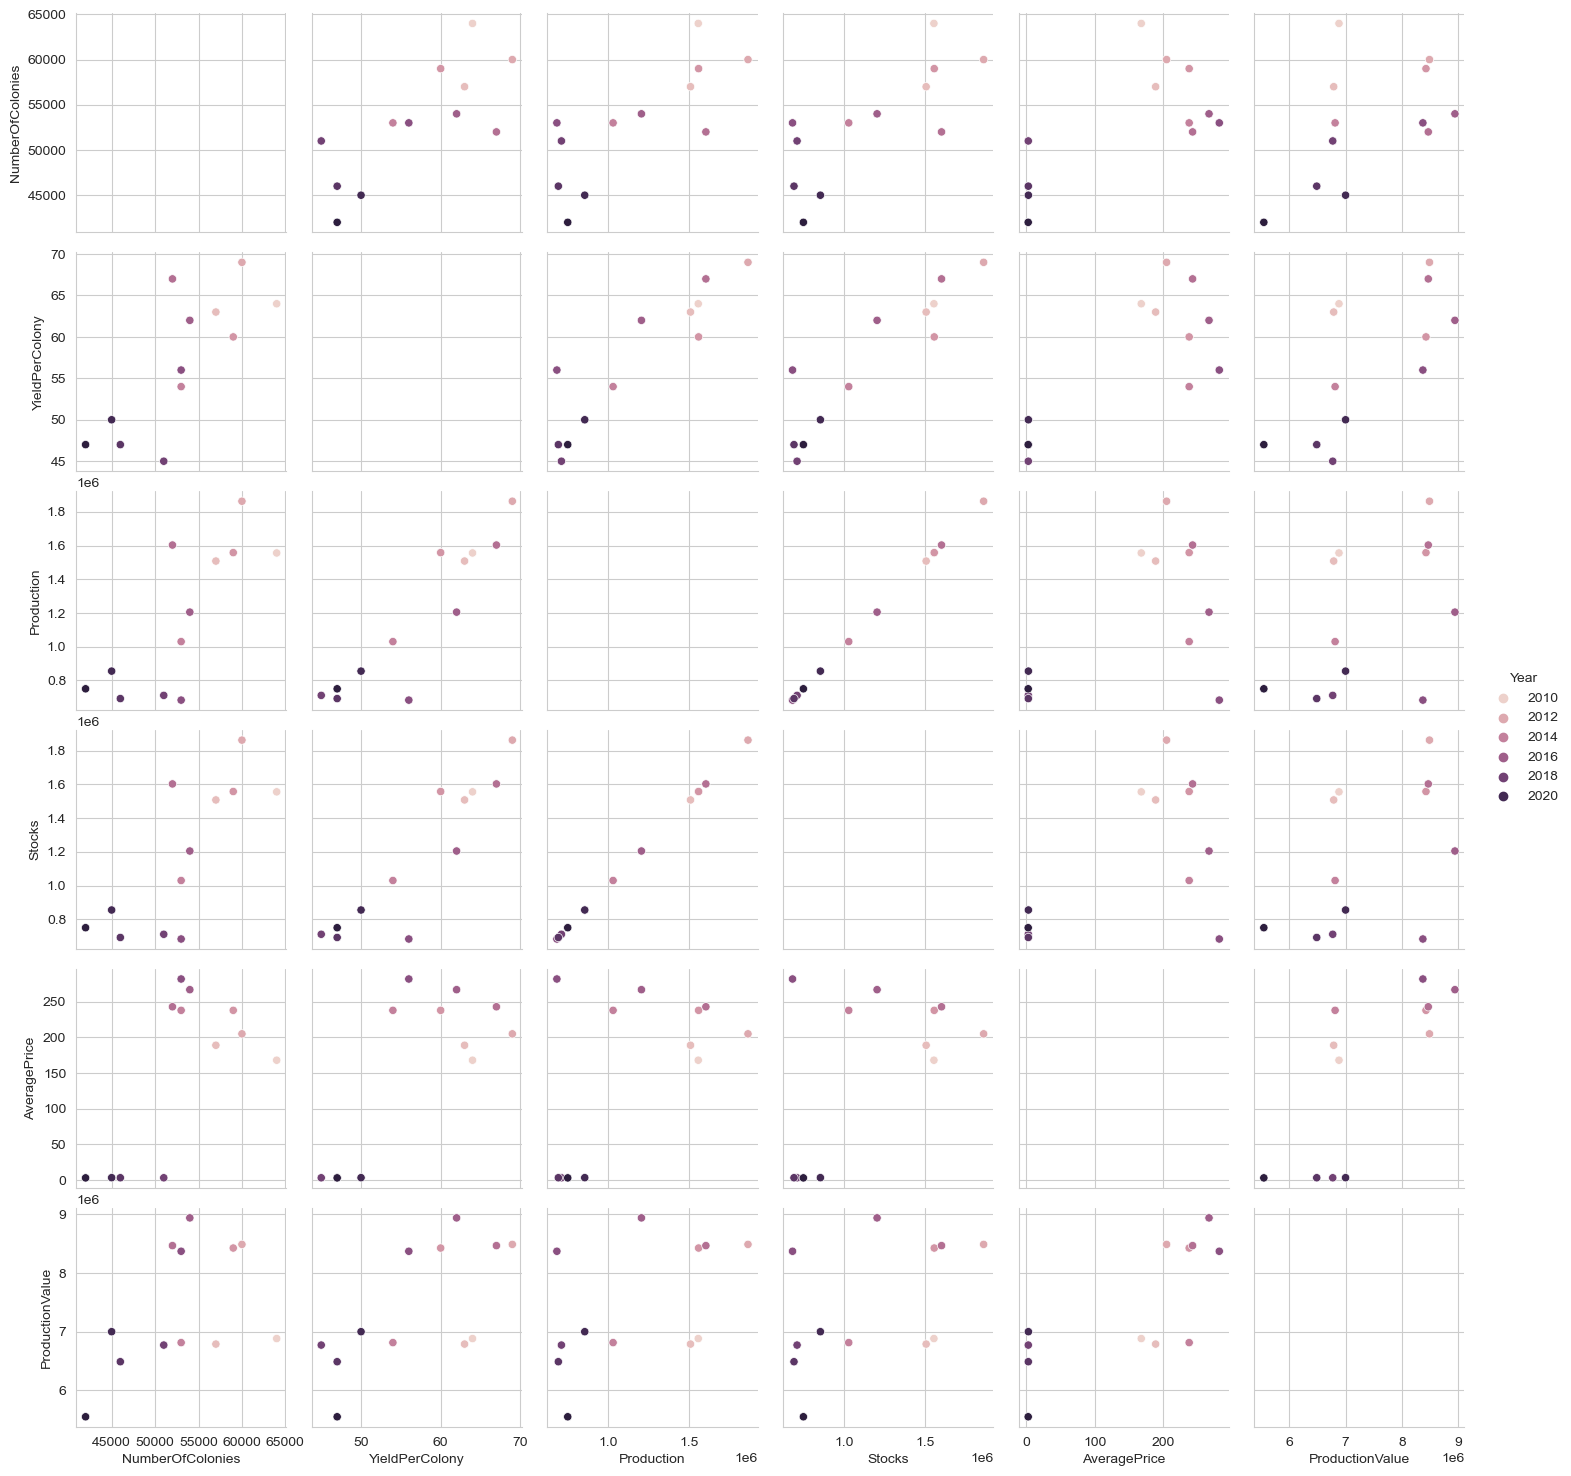

In [57]:
# Quick dataframe to look at data based on state. Change state name to desired state.
honeyState = honeyDFR[honeyDFR["State"] == "Wisconsin"]

# Line plot to look between different variables.
plt.plot(honeyState['Year'],honeyState['Production'])
plt.show()

# Pair plot to look at correlations between each variable.
sb.pairplot(honeyState, hue = 'Year')
plt.show()

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_5984\1231010988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(honeyDFR.corr(), annot = True)


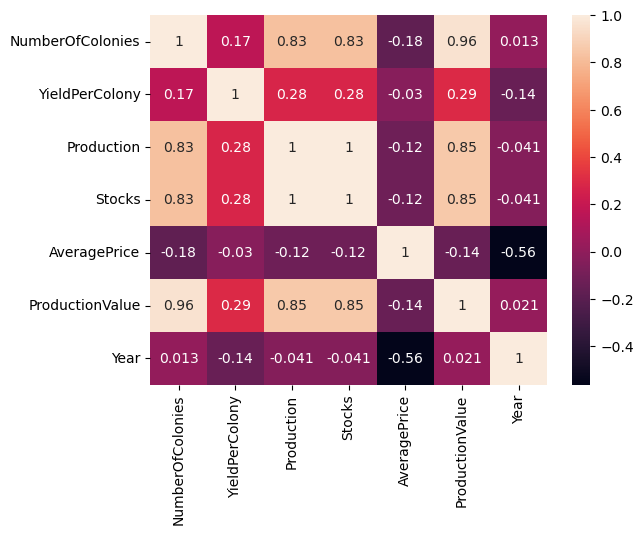

In [53]:
# Checking for any correlation between data. Could also be used with the state dataframe to check by state.
# Similar to the pair plot of above but faster loading.
sb.heatmap(honeyDFR.corr(), annot = True)
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? There wasn't any missing data, which was a nice surprise. Some of the available data seems odd, though.
2. Do you have any concerns about your dataset? The average price of honey per pound seems way off. Also, the values in the Production and ProductionValues columns seem to be off according to how the Kaggle documentation says the data was calculated.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? The data in AveragePrice, Production, and ProductionValues may need to be modified. Also, Stocks seems to hold the same data as Production and could possibly be dropped. I already did some cleaning already in dropping the unnamed column and renaming the column headers.